In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

C:\Users\tbwil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# load in the precipitation and temperature data
rainfall_data = np.load("data/weather_data/rainfall_data.npy").astype(float)
snowfall_data = np.load("data/weather_data/snowfall_data.npy").astype(float)
max_temp_data = np.load("data/weather_data/max_temp_data_interp.npy").astype(float)
min_temp_data = np.load("data/weather_data/min_temp_data_interp.npy").astype(float)
lats = np.load("data/weather_data/lats.npy")
lons = np.load("data/weather_data/lons.npy")

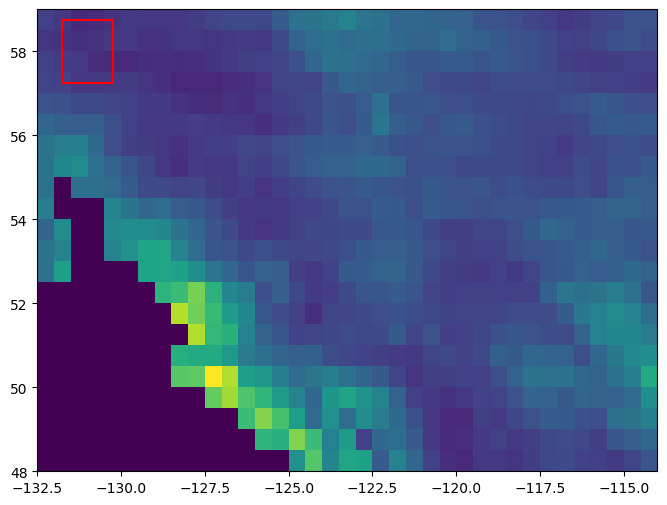

In [4]:
rain_max = np.max(rainfall_data, axis=0)

plt.figure(figsize=(8, 6))
plt.pcolormesh(lons, lats, rain_max, cmap='viridis', shading='auto')
# draw a rectangle around the region of interest
plt.plot([lons[1], lons[4]], [lats[21], lats[21]], color='red')
plt.plot([lons[4], lons[4]], [lats[21], lats[18]], color='red')
plt.plot([lons[4], lons[1]], [lats[18], lats[18]], color='red')
plt.plot([lons[1], lons[1]], [lats[18], lats[21]], color='red')
plt.show()

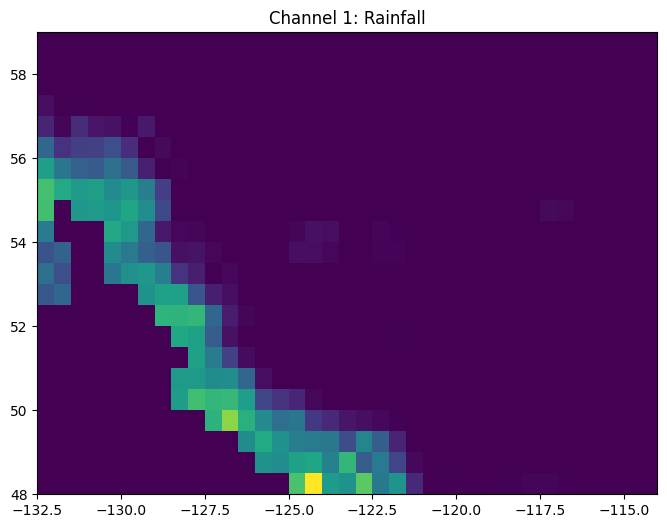

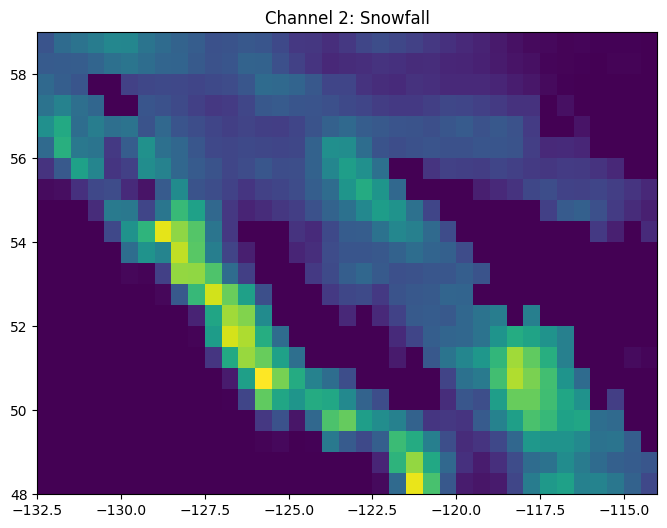

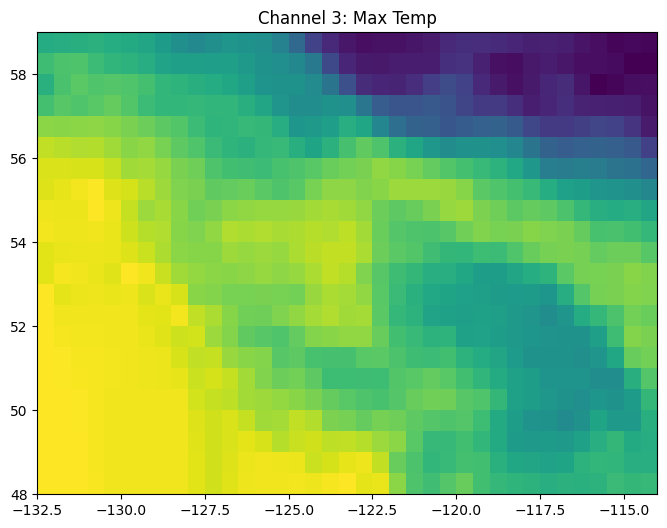

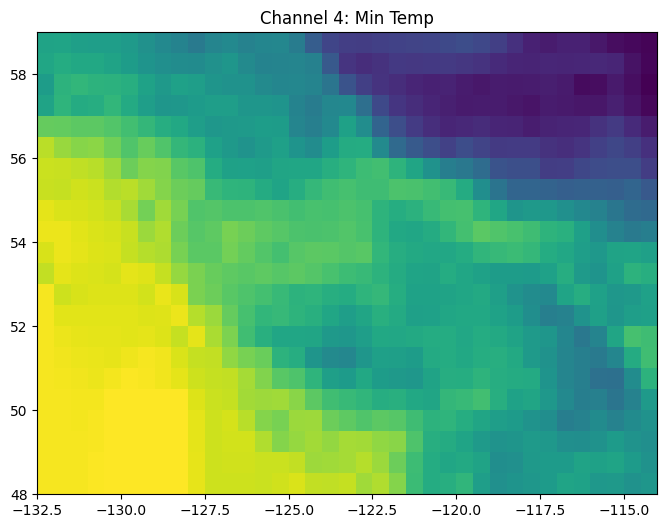

In [22]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(lons, lats, rainfall_data[20], cmap='viridis', shading='auto')
plt.title("Channel 1: Rainfall")
plt.show()
# snowfall
plt.figure(figsize=(8, 6))
plt.pcolormesh(lons, lats, snowfall_data[20], cmap='viridis', shading='auto')
plt.title("Channel 2: Snowfall")
plt.show()
# max temp
plt.figure(figsize=(8, 6))
plt.pcolormesh(lons, lats, max_temp_data[20], cmap='viridis', shading='auto')
plt.title("Channel 3: Max Temp")
plt.show()
# min temp
plt.figure(figsize=(8, 6))
plt.pcolormesh(lons, lats, min_temp_data[20], cmap='viridis', shading='auto')
plt.title("Channel 4: Min Temp")
plt.show()

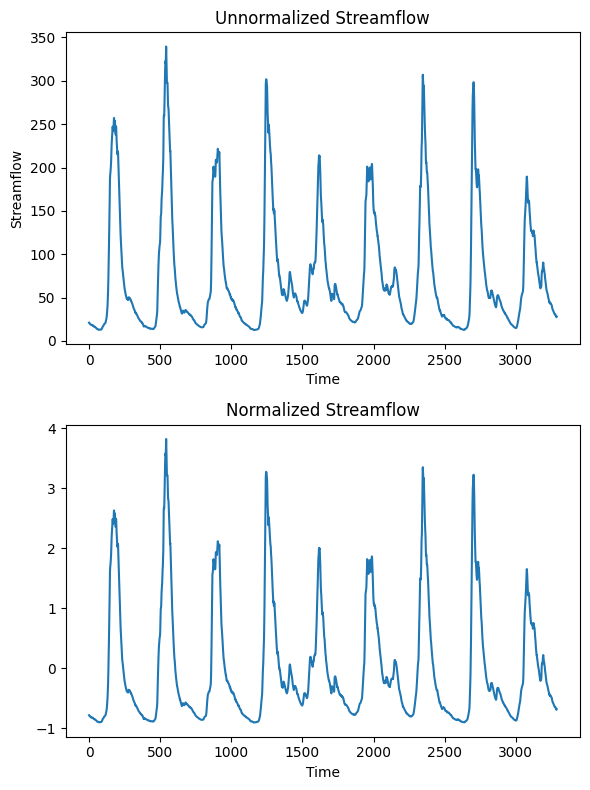

In [ ]:
import matplotlib.pyplot as plt

# Ensure streamflow_data and streamflow_data_norm are properly defined arrays
fig, ax = plt.subplots(2, 1, figsize=(6, 8))  # 1 row, 2 columns of subplots

# Plot unnormalized streamflow on the first subplot
ax[0].plot(streamflow_data[:, 0])  # Use ax[0] for the first subplot
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Streamflow")
ax[0].set_title("Unnormalized Streamflow")

# Plot normalized streamflow on the second subplot
ax[1].plot(streamflow_data_norm[:, 0])  # Use ax[1] for the second subplot
ax[1].set_xlabel("Time")
# ax[1].set_ylabel("Normalized Streamflow")
ax[1].set_title("Normalized Streamflow")

# Adjust layout and show the plot
plt.tight_layout()  # Prevent overlap
plt.show()


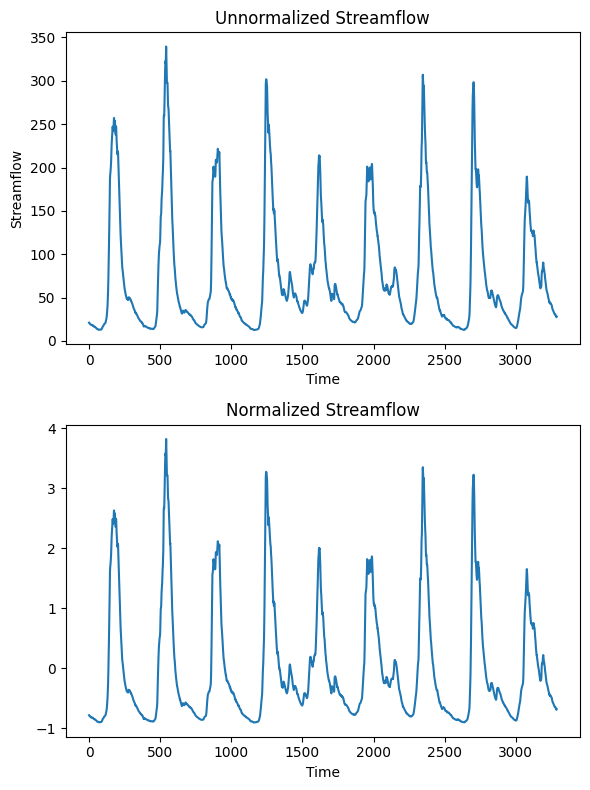

In [ ]:
import matplotlib.pyplot as plt

# Ensure streamflow_data and streamflow_data_norm are properly defined arrays
fig, ax = plt.subplots(2, 1, figsize=(6, 8))  # 1 row, 2 columns of subplots

# Plot unnormalized streamflow on the first subplot
ax[0].plot(streamflow_data[:, 0])  # Use ax[0] for the first subplot
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Streamflow")
ax[0].set_title("Unnormalized Streamflow")

# Plot normalized streamflow on the second subplot
ax[1].plot(streamflow_data_norm[:, 0])  # Use ax[1] for the second subplot
ax[1].set_xlabel("Time")
# ax[1].set_ylabel("Normalized Streamflow")
ax[1].set_title("Normalized Streamflow")

# Adjust layout and show the plot
plt.tight_layout()  # Prevent overlap
plt.show()


In [5]:
# load the streamflow data
streamflow_data = pd.read_csv("data/streamflow_data/Final_Processed_Station_Data_Watershed.csv")
streamflow_data.dropna(inplace=True)

C:\Users\tbwil\AppData\Local\Temp\ipykernel_24072\212089372.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241) have mixed types. Specify dtype option on import or 

In [6]:
station_lats = streamflow_data.iloc[0][1:]
station_lons = streamflow_data.iloc[1][1:]
watersheds = streamflow_data.iloc[2][1:]

# drop the first 3 rows
streamflow_data = streamflow_data.drop([0, 1, 2])
# drop the first column
streamflow_data = streamflow_data.drop(columns=["name"])
streamflow_data = streamflow_data.astype(float)

streamflow_data_norm = (streamflow_data - streamflow_data.mean()) / streamflow_data.std()
streamflow_data_norm = streamflow_data_norm.to_numpy()
streamflow_data = streamflow_data.to_numpy()

In [7]:
streamflow_data_norm.shape

(3287, 241)

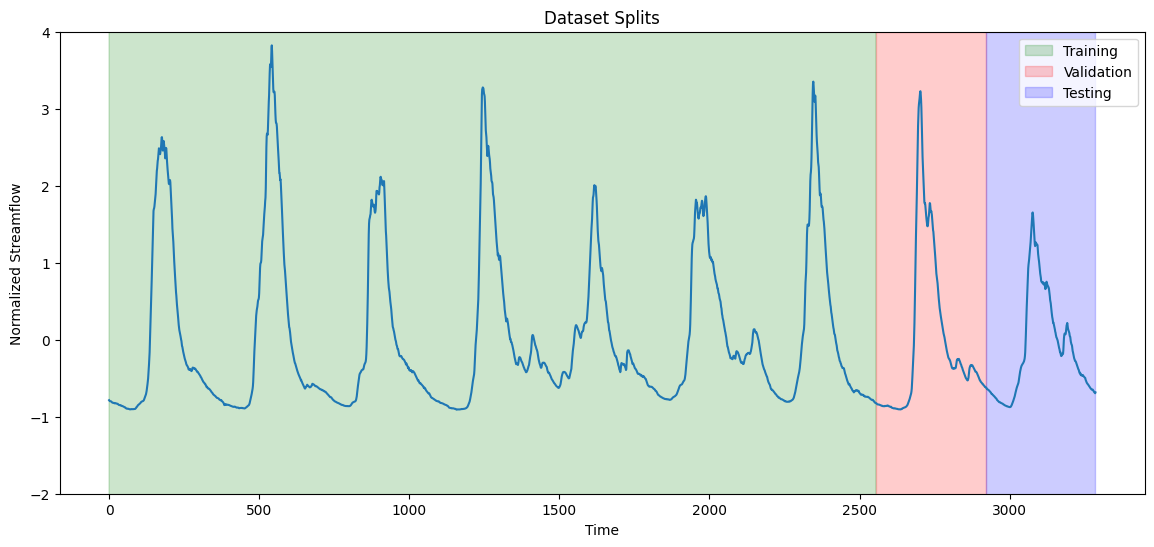

In [8]:
# plot the normalized streamflow data for a given station
n_days = streamflow_data_norm.shape[0]
plt.figure(figsize=(14, 6))
# fill between the last 365 days of training data and the test data
plt.fill_between(np.arange(0, int(7/9*n_days)), -4, 4, color='green', alpha=0.2, label='Training')
plt.fill_between(np.arange(int(7/9*n_days), int(8/9*n_days)), -4, 4, color='red', alpha=0.2, label='Validation')
plt.fill_between(np.arange(int(8/9*n_days), n_days), -4, 4, color='blue', alpha=0.2, label='Testing')

plt.plot(streamflow_data_norm[:,0])
plt.xlabel("Time")
plt.ylabel("Normalized Streamflow")
plt.ylim(-2, 4)
plt.title("Dataset Splits")
plt.legend()
plt.show()

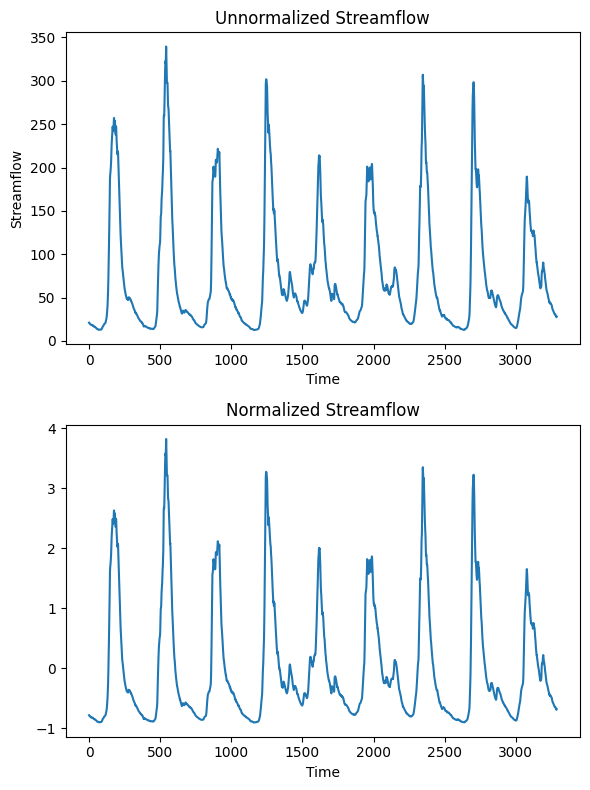

In [17]:
import matplotlib.pyplot as plt

# Ensure streamflow_data and streamflow_data_norm are properly defined arrays
fig, ax = plt.subplots(2, 1, figsize=(6, 8))  # 1 row, 2 columns of subplots

# Plot unnormalized streamflow on the first subplot
ax[0].plot(streamflow_data[:, 0])  # Use ax[0] for the first subplot
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Streamflow")
ax[0].set_title("Unnormalized Streamflow")

# Plot normalized streamflow on the second subplot
ax[1].plot(streamflow_data_norm[:, 0])  # Use ax[1] for the second subplot
ax[1].set_xlabel("Time")
# ax[1].set_ylabel("Normalized Streamflow")
ax[1].set_title("Normalized Streamflow")

# Adjust layout and show the plot
plt.tight_layout()  # Prevent overlap
plt.show()
